## Deep Learning

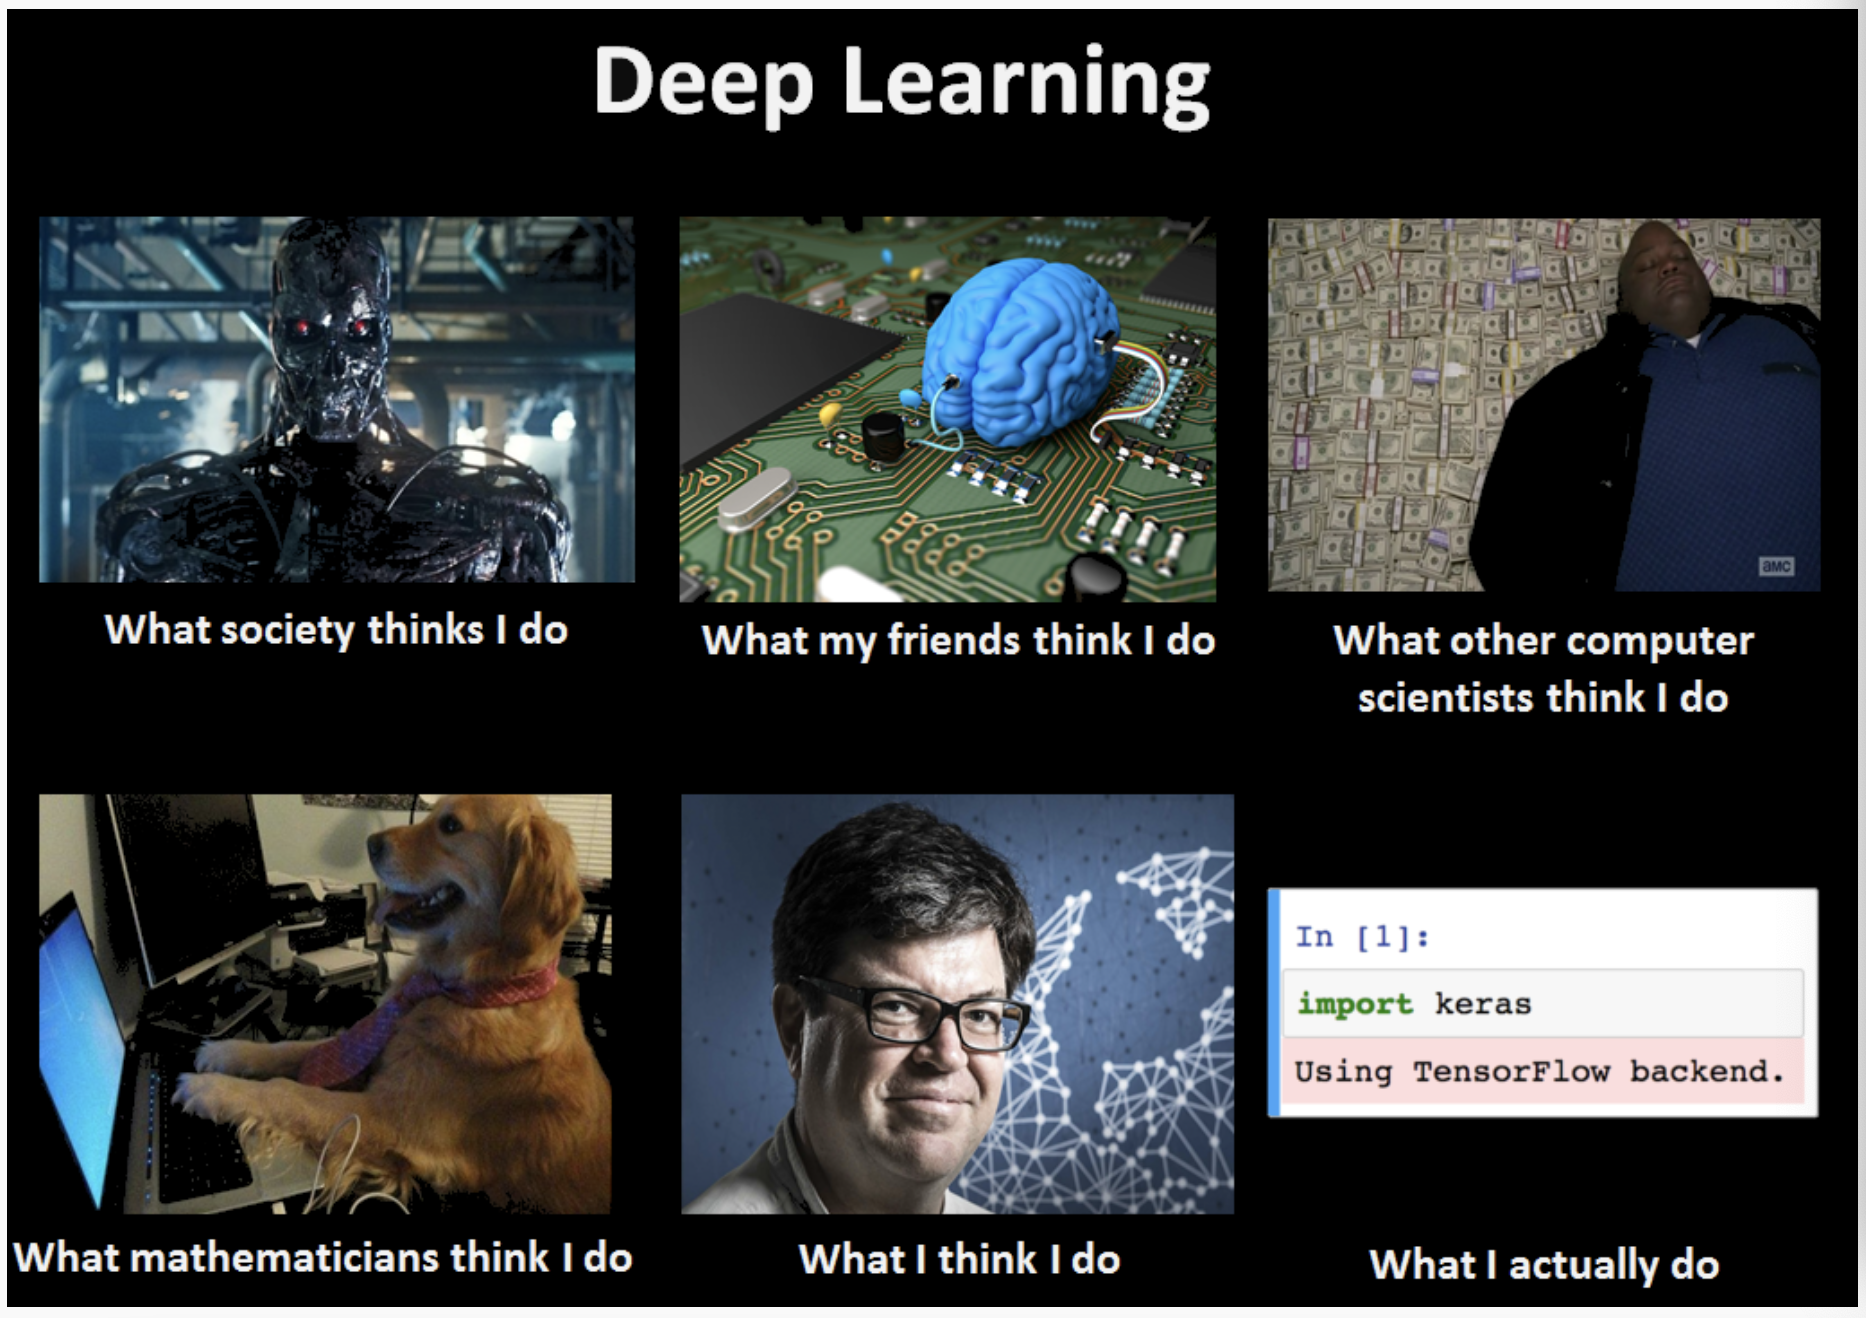

There are a large set of introductions to neural networks online, for example:
- A Book by Ian Goodfellow and Yoshua Bengio and Aaron Courville:
https://www.deeplearningbook.org
- Andrej Karpathy’s Hacker’s guide to Neural Networks: http://karpathy.github.io/neuralnets/
- Geoffrey E. Hinton, Yann LeCun, and Yoshua Bengio (video; NIPS 2015):
    http://research.microsoft.com/apps/video/default.aspx?id=259574

### Timeline 

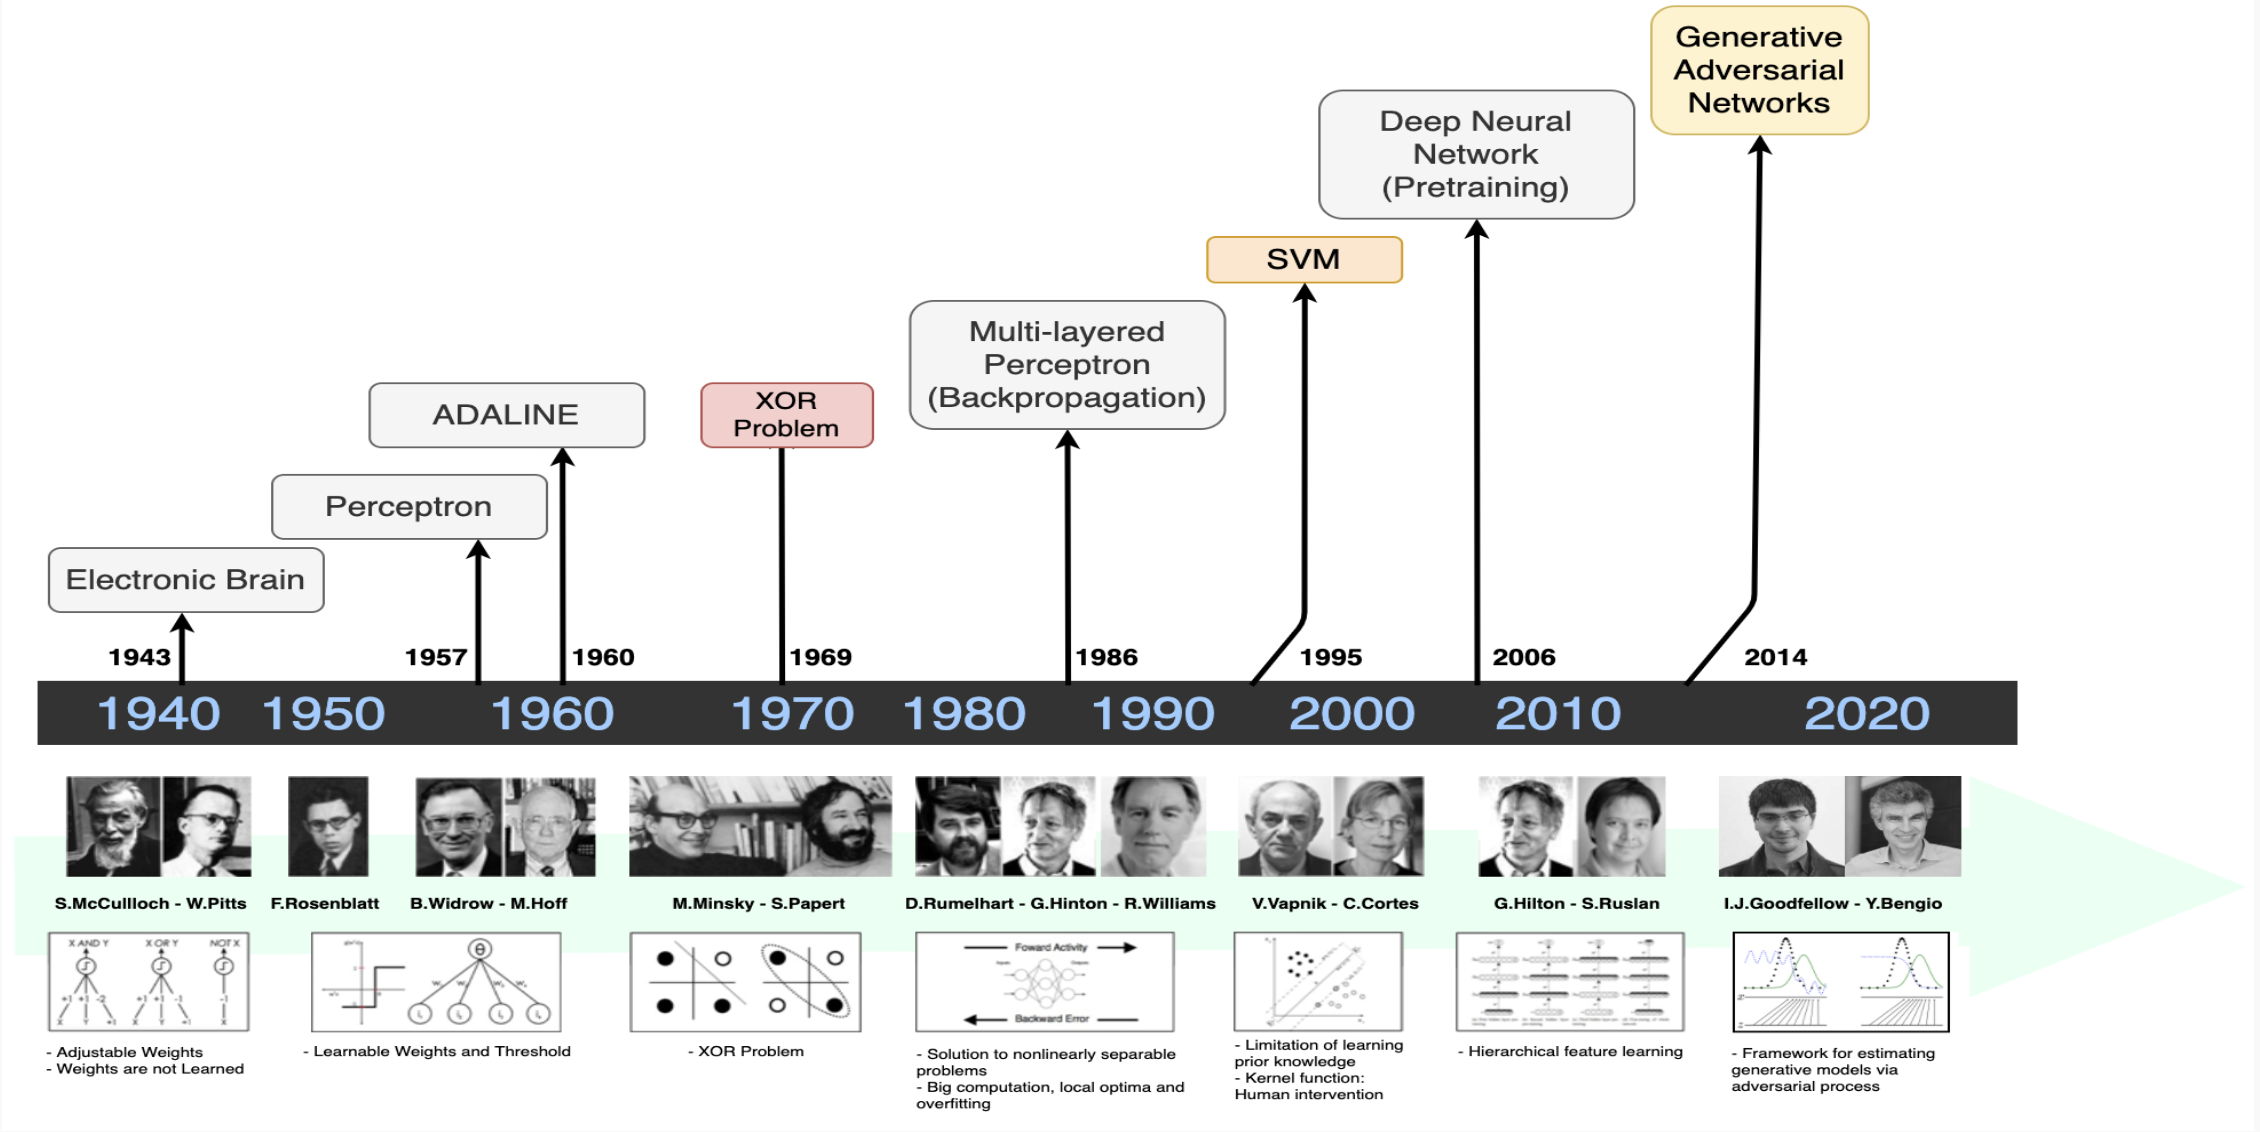

Main event on DL after 2000

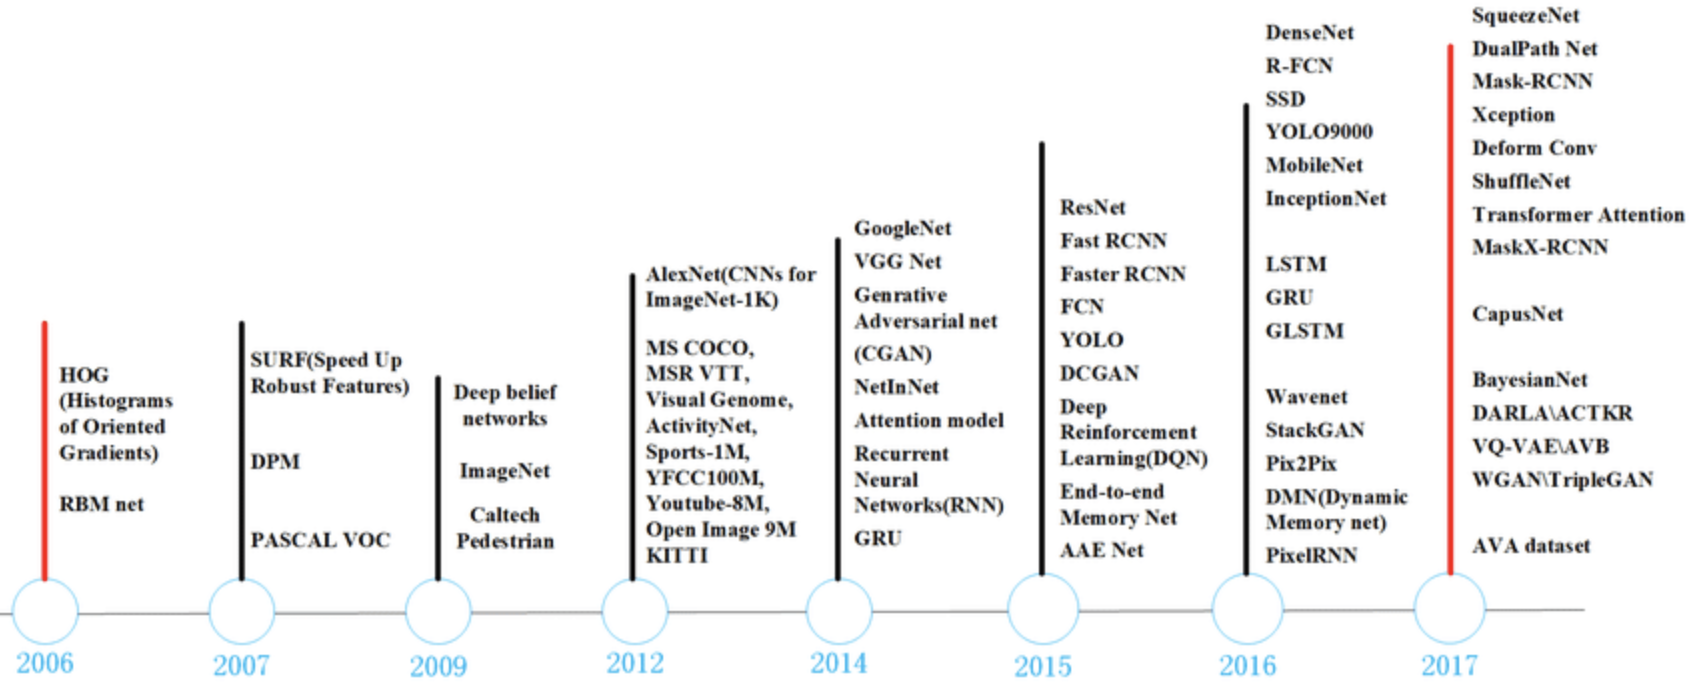

### Applications
-  Computer Vision.

ImageNet is a great example. It’s the largest publicly available dataset of labeled images, with more than 10 million images sorted into a thousand different classes. Since 2010, there’s been an annual ImageNet Large Scale Visual Recognition Challenge, aiming to measure the classification accuracy of different computer vision models. Accuracy is measured on a test set of images that have not previously been used for training the models.

- Text Analysis \& Understanding.
   
It includes document classification, sentiment analysis, automatic translation...

- Speech Recognition.

The most widely researched is voice to text, or taking the spoken word and turning it into text on the screen. 

- Computer Games.

Google DeepMind used deep learning to train its “AlphaGo” program and defeat Lee Sedol, one of the strongest human Go players.

- Fraud detection.

- Self-driving cars.

- ...

reference: https://www.yaronhadad.com/deep-learning-most-amazing-applications/




Publication on Arxiv (https://arxiv.org)

ArXiv papers on Machine Learning and Artificial Intelligence: 2007-2019

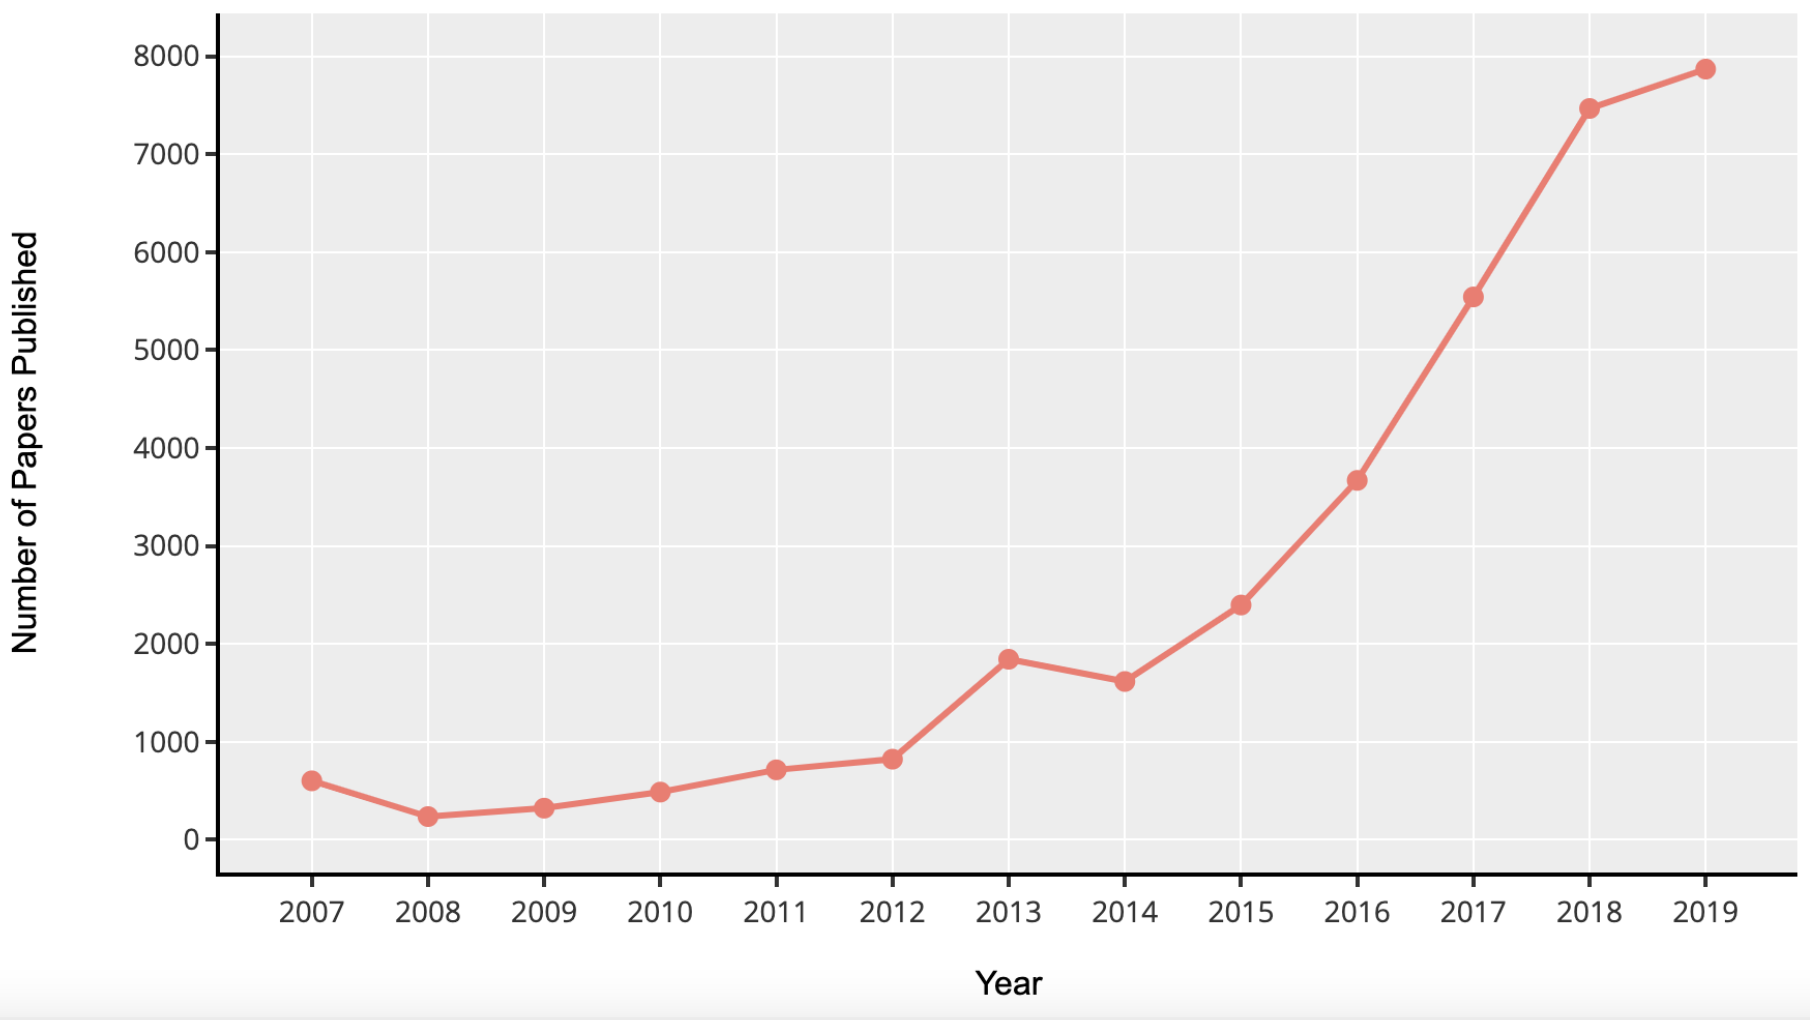

### What drives?
Several key advancements have enabled the modern deep learning revolution.

- Computing 

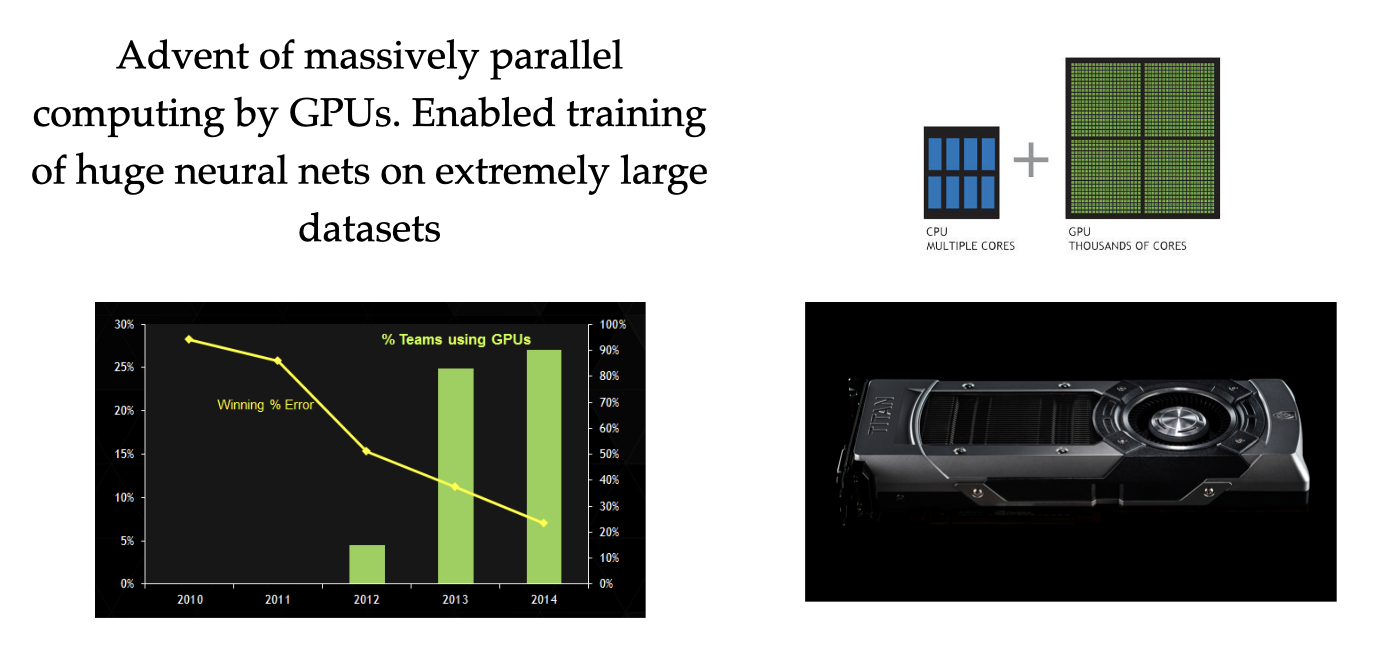

- Methodology

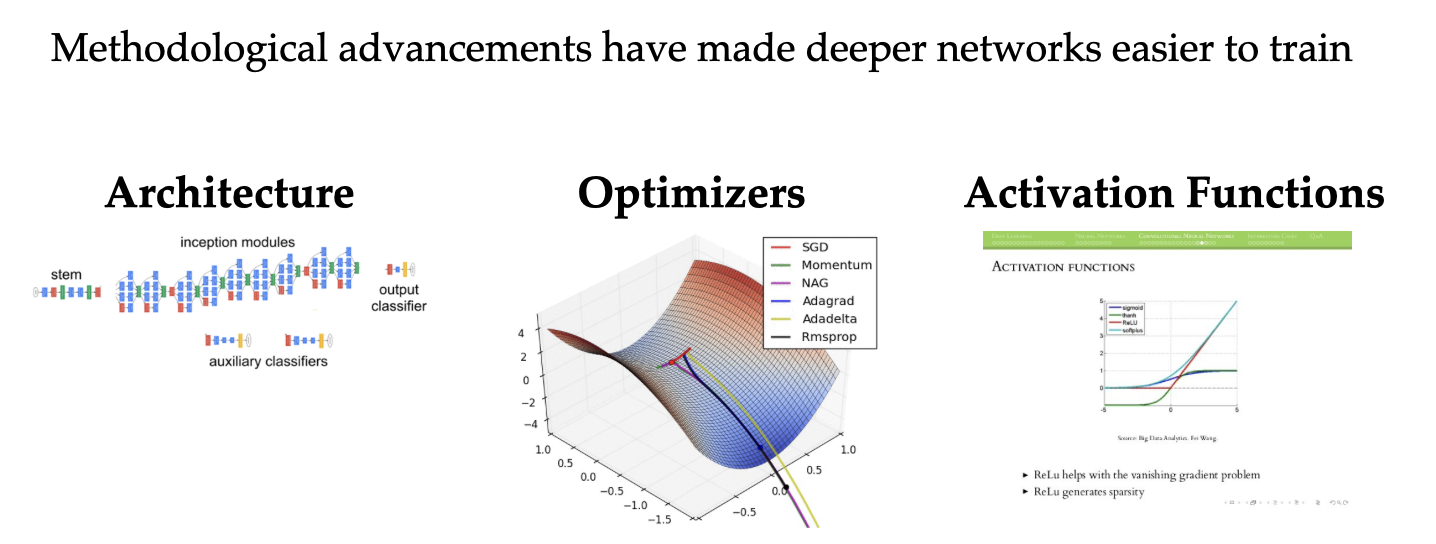

- differential tools

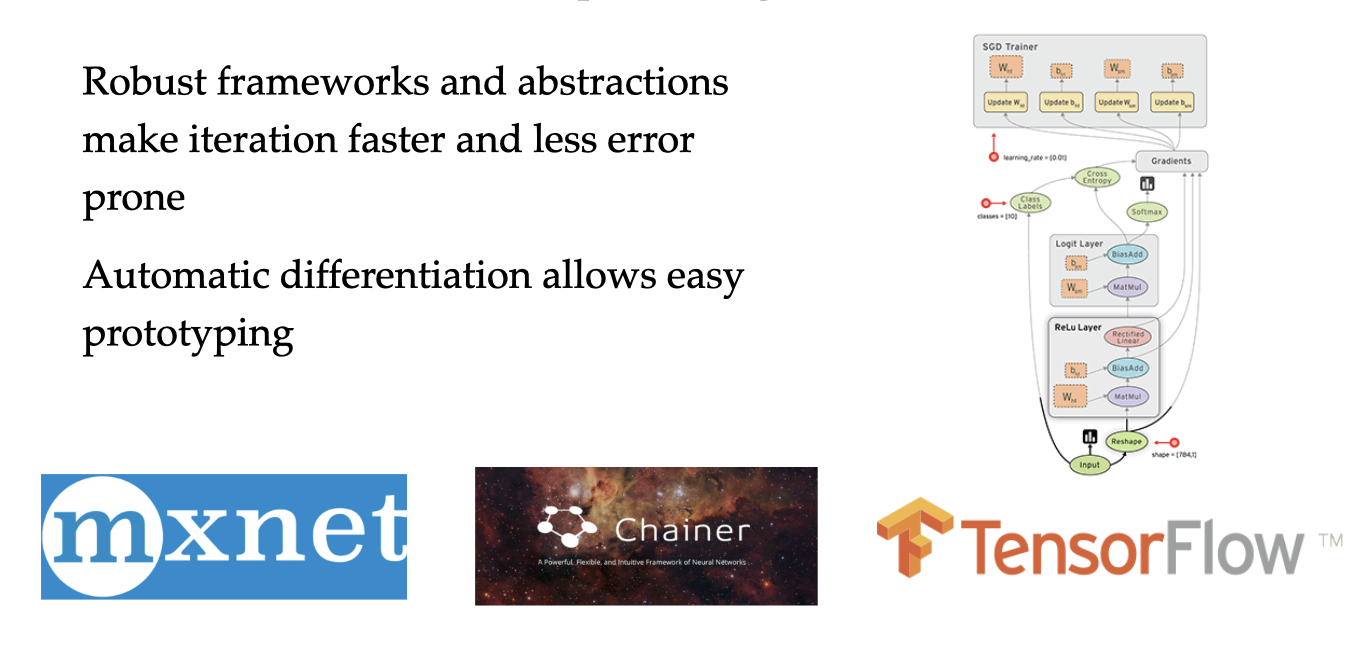

## From logistic regression to neural networks

### Logistic Regression Revisited

Think about a binary classification problem. The logistic regression model uses a function, called the logistic function, to model 
$$P(Y=1)= \frac{1}{1 + e^{-(\beta_0+\beta_1 X)}}$$

Find the coefficients that minimize the loss function
$$L(\beta_0,\beta_1) = - \sum_{i=1}^{n}\{y_i\log p_i + (1-y_i)\log(1-p_i)\}$$

Step by step
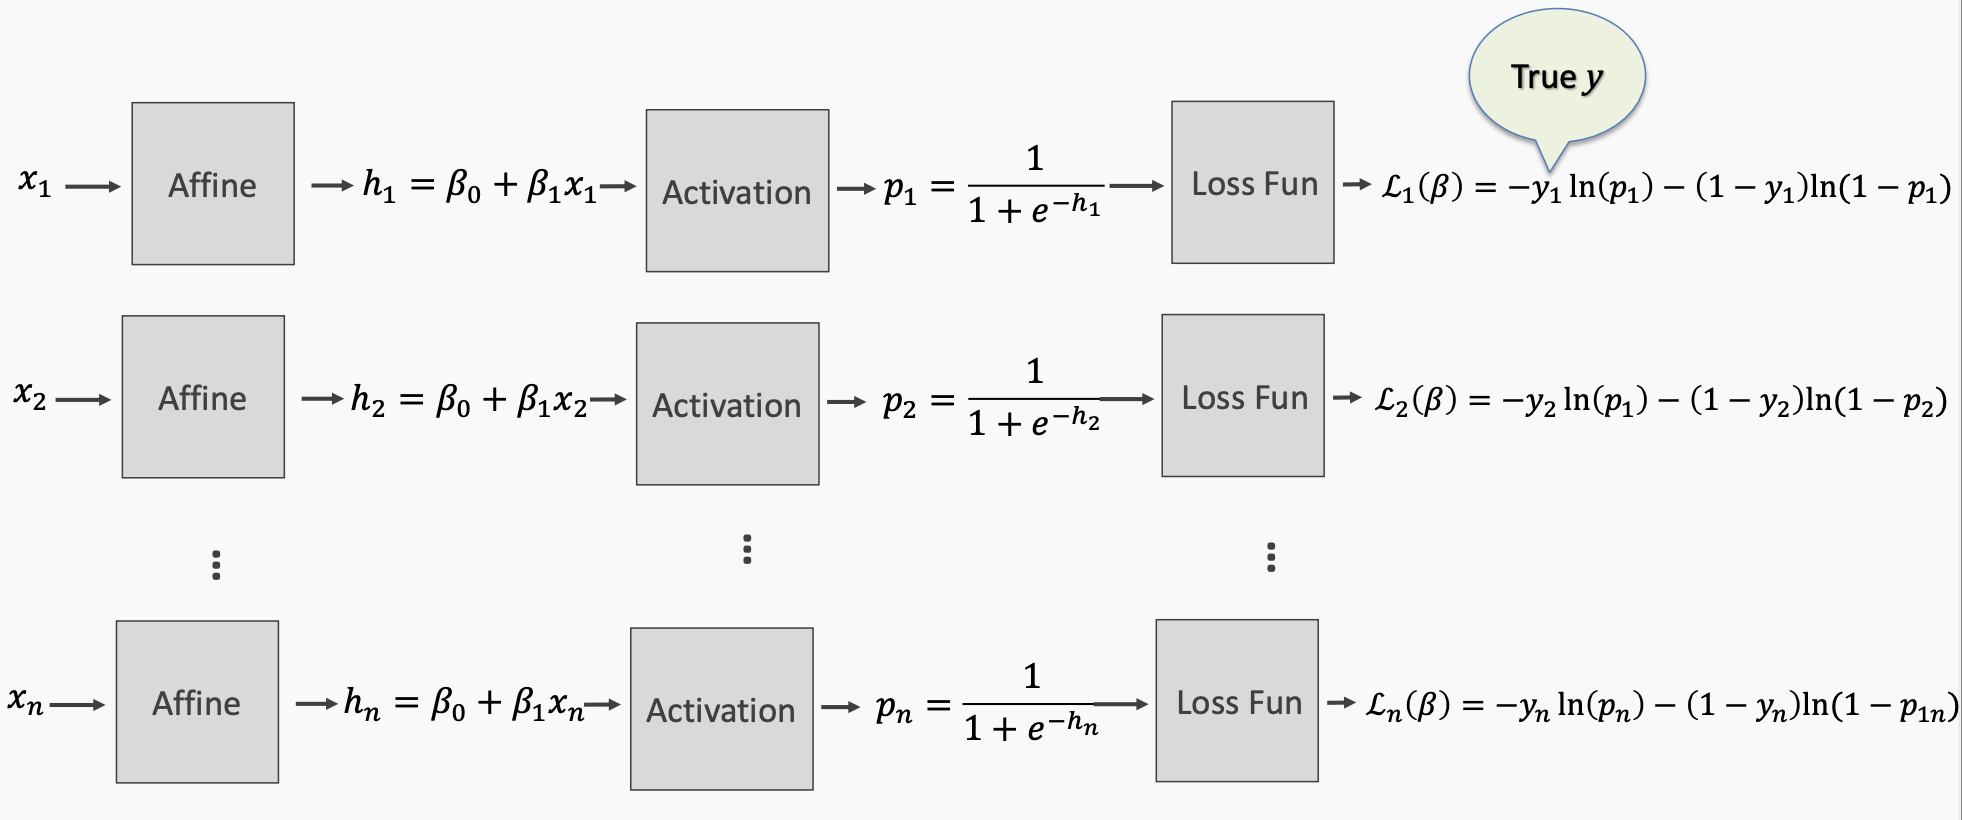

It becomes
$$X \longrightarrow h= X\beta \longrightarrow \color{red}{\hat{y}}=\sigma(X\beta)\longrightarrow L(\hat{Y},Y) $$
with an activation function $\sigma$.

- the activation function $\sigma$ operates on a vector with vectorization, that is, $\sigma(v) = (\sigma(v_1),\cdots,\sigma(v_p))^\top$ for vector $v=(v_1,\cdots,v_p)^\top.$
- Commonly used activation functions are:

  ReLu, Sigmoid, ...

## Feedforward
Motivation:
<img src="fig/neurals.png" width="500" height="400">

### Components

Representations:
- Input
- Hidden variables
 
Layers/weights:
 - Hidden layers 
 - Output layer
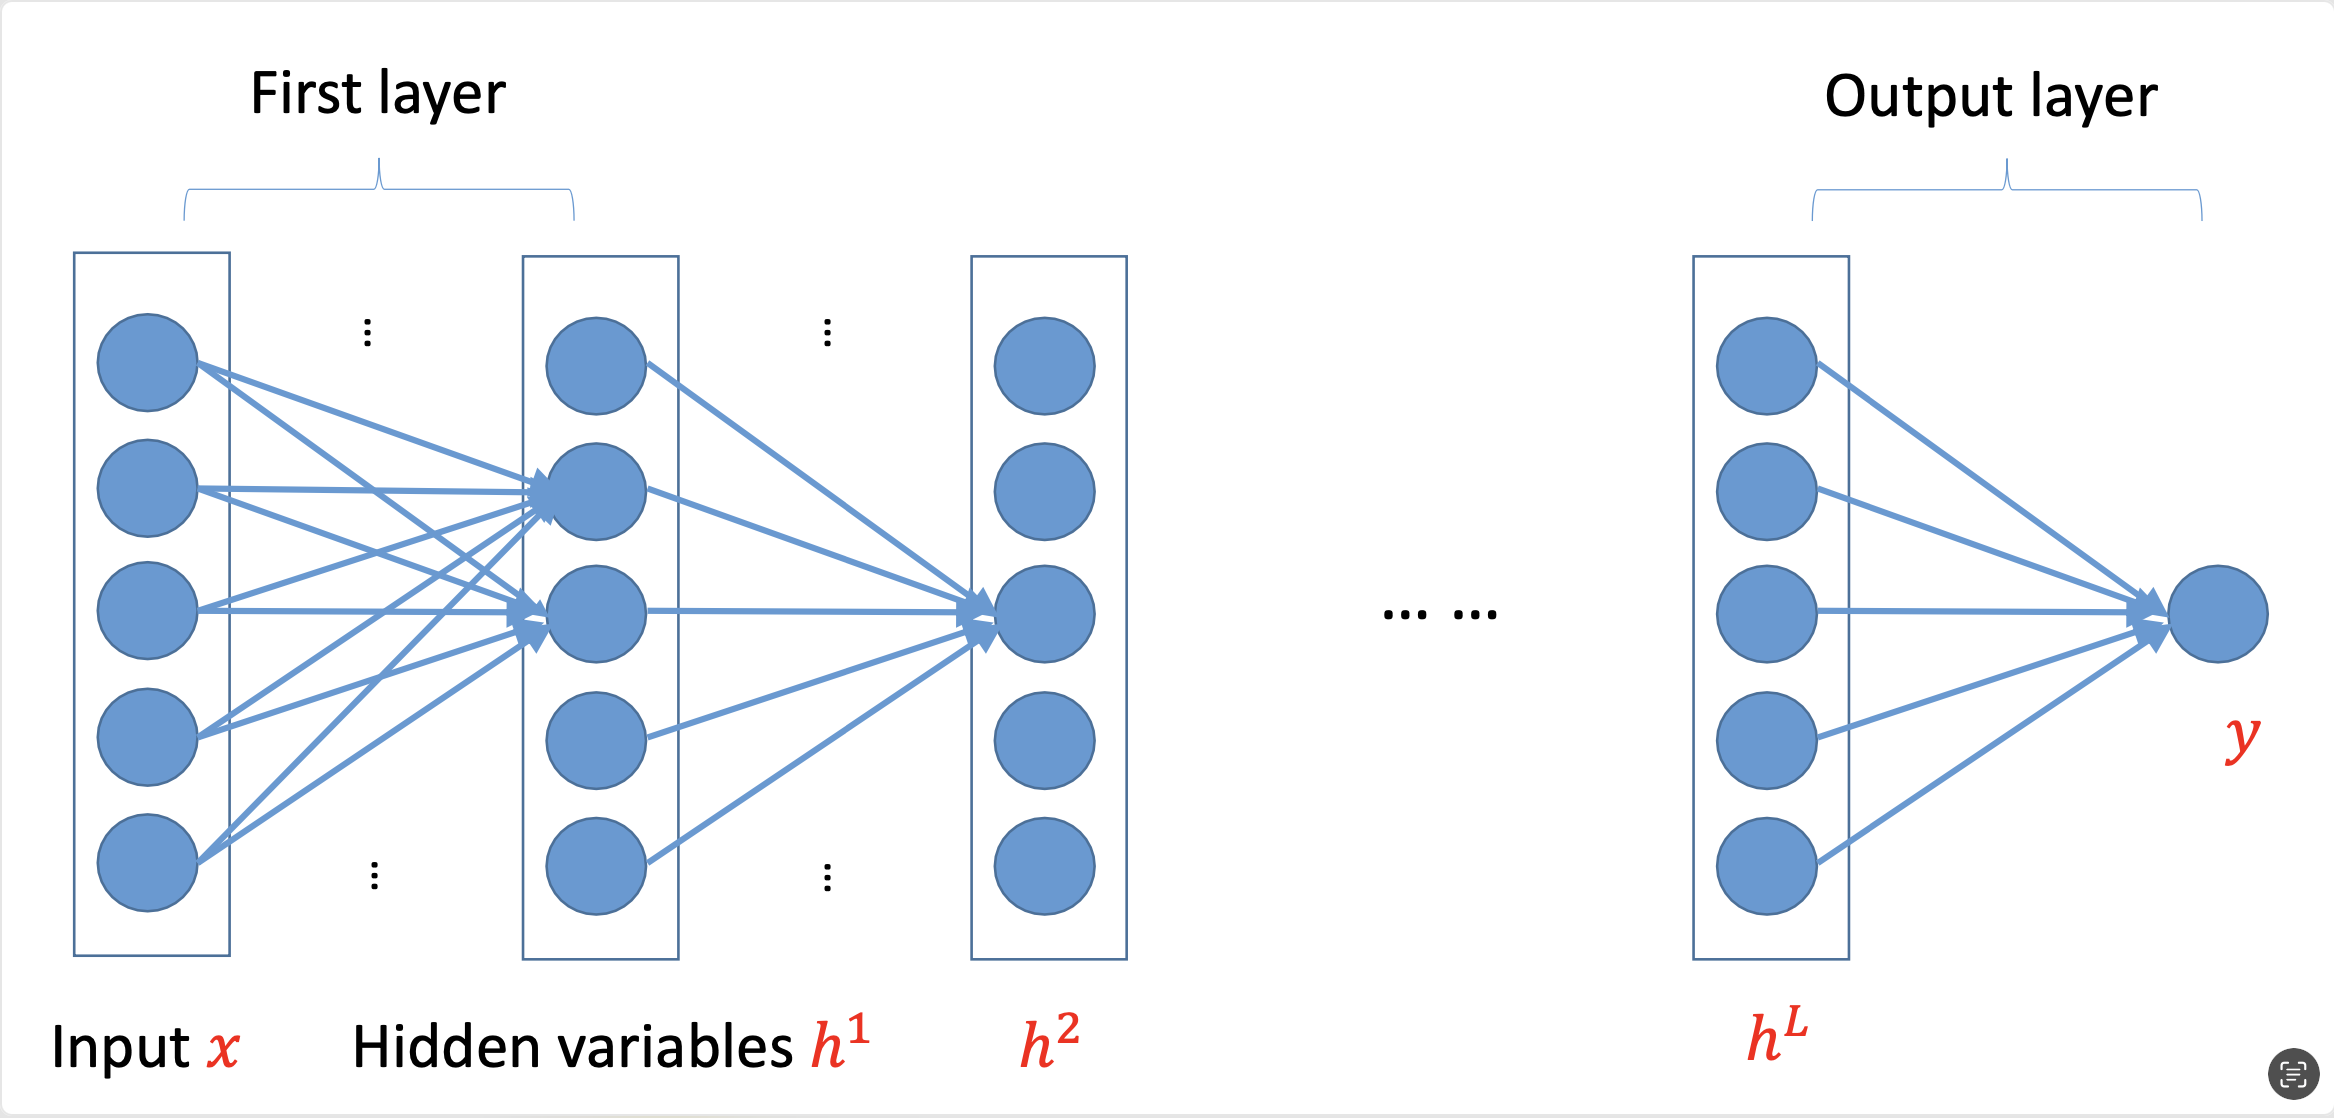

**Notes:**

1.It is better to do some preprocessing for the input varaible $X,$ i.e., standization or normalization.

2.Output could be Multi-dimensional, e.g.,
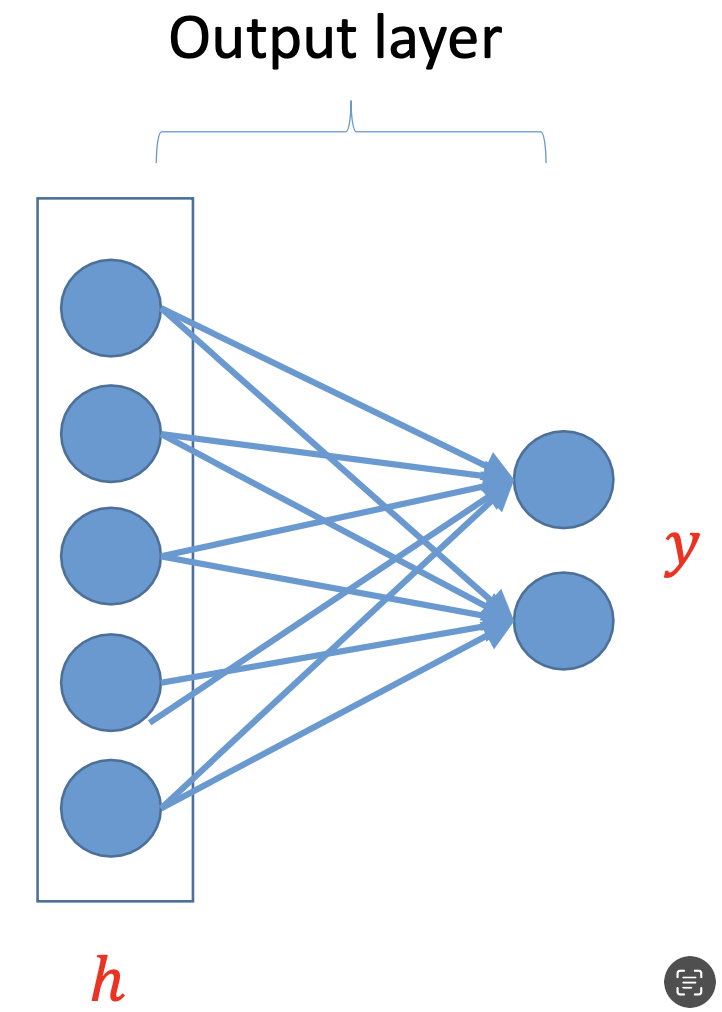

#### Hidden layers
- Neuron take weighted linear combination of the previous layer
- So can think of input value for the next layer

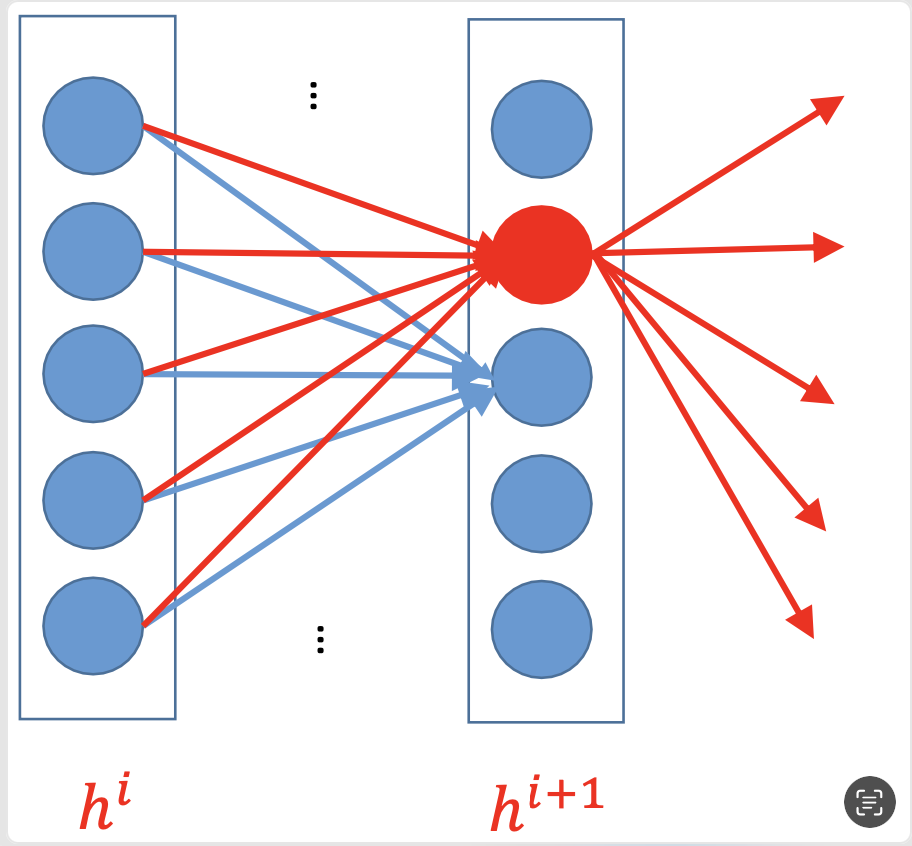

## Backpropagation
How to train a neural network model?
 - Gradient descent.
 
 Minimize loss $$L_n(\theta)=\frac{1}{n}\sum_{i=1}^{n}l(f_\theta(X_i),Y_i)$$
  - Initialize $\theta_0$
  - update $\color{red}{\theta:\theta_{t+1} = \theta_{t}-{\eta_t}{\triangledown_{\theta} L(\theta)}\big|_{\theta=\theta_t} }$

Gradient of the loss is simple, e.g.,
$$l(f_\theta(x),y)=(f_\theta(x)-y)^2  $$ 
$$y\log(\frac{1}{1+e^{-f_\theta(x)}})+(1-y)\log(1-\frac{1}{1+e^{-f_\theta(x)}}) $$
$$\frac{\partial l}{\partial \theta}=2(f_\theta-y)\frac{\partial f_\theta}{\partial \theta}$$

**Key: Chain rules**

Single neuron
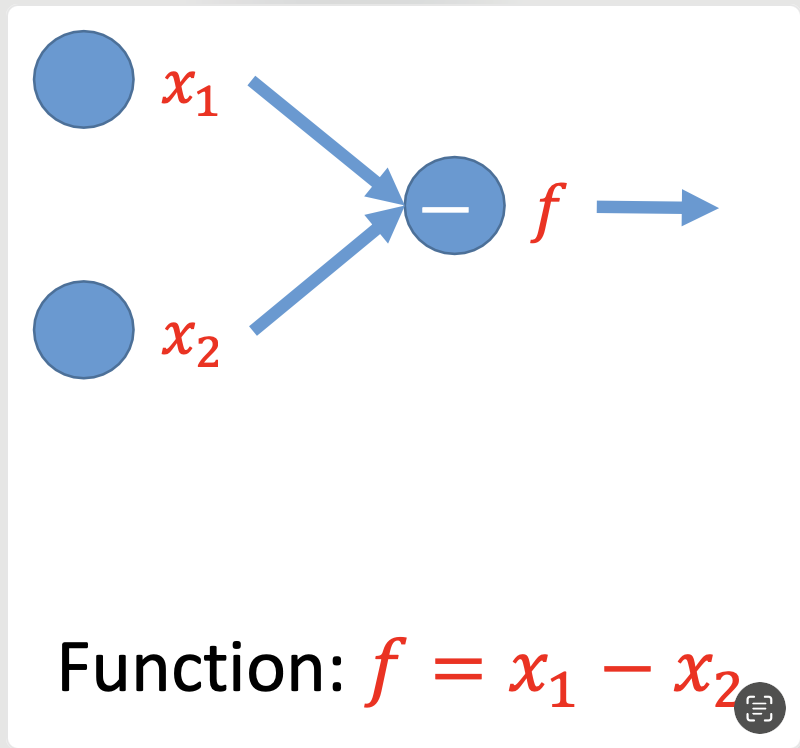

<img src="fig/back2.png" width="260" heigth="200">

Two neurons

<img src="fig/back3.png" width="400" heigth="200">



<img src="fig/back4.png" width="400" heigth="200">

Weights on the edges

<img src="fig/back5.png" width="400" heigth="200">


<img src="fig/back6.png" width="400" heigth="200">

Neurons with activation

<img src="fig/back7.png" width="500" heigth="200">

<img src="fig/back8.png" width="500" heigth="200">

<img src="fig/back9.png" width="500" heigth="200">

Multiple paths

<img src="fig/back10.png" width="500" heigth="200">

<img src="fig/back11.png" width="500" heigth="200">

<img src="fig/back12.png" width="800" heigth="200">

Summary of feedforward and backward
- Forward to compute
- Backward to compute the gradients
<img src="fig/fordback.png" width="400" heigth="200">

Stochastic gradient descent (SGD)

Update rule:
$$\theta_{t+1} = \theta_t - \eta_t\triangledown_{\theta}\big(\frac{1}{m}\sum_{j=1}^{m}l(f_\theta(X^{(j)}),Y^{(j)})\big)\big|_{\theta=\theta_t}, $$
where $(X^{(j)},Y^{(j)}),j=1,\cdots,m$ are randomly selected from $(X_i,Y_i),i=1,\cdots,n$ without replacement.

**Mini-batch:** work with a small batch of $b$ points
$$(X_{tb+1},Y_{tb+1}),\cdots,(X_{tb+b},Y_{tb+b})$$
and update rule is
$$\theta_{t+1} = \theta_t - \eta_t\triangledown_{\theta}\big(\frac{1}{b}\sum_{j=1}^{b}l(f_\theta(X_{tb+j}),Y_{tb+j})\big)\big|_{\theta=\theta_t}, $$
Notes: typically, the batch size is taken to be 64 and 128.


In [37]:
import math
import numpy as np
import pandas as pd
import sys
if '../data' not in sys.path: sys.path.append('../data')
from mylib import *

# get mini batches with randomly resampling data
# revised from https://blog.csdn.net/qq_42798343/article/details/127234281
def random_mini_batches(X, Y, mini_batch_size):
    m = X.shape[1]
    permutation = list(np.random.permutation(m))
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[:, permutation]
    mini_batches = []
    # each mini_batch
    full_batch_size = math.floor(m / mini_batch_size)
    for i in range(full_batch_size):
        mini_batch_X = X_shuffled[:, i * mini_batch_size:(i + 1) * mini_batch_size]
        mini_batch_Y = Y_shuffled[:, i * mini_batch_size:(i + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    # remainding data
    if (m % mini_batch_size != 0):
        mini_batch_X = X_shuffled[:, full_batch_size * mini_batch_size:] #如果不能整除，就把剩下的放入mini_batch 里
        mini_batch_Y = Y_shuffled[:, full_batch_size * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches

In [39]:
# initialize parameters
def initialize_parameters(layer_dims):
    L = len(layer_dims)
    parameters = {}
    for i in range(1, L):
        # divide np.sqrt(layers_dims[i - 1]) to avoid gradient vanish or explosion
        parameters['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i - 1])/np.sqrt(layer_dims[i - 1])
        parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))
    return parameters

def initialize_adam(parameters):
    L = len(parameters) // 2
    v = {}
    s = {}
    for i in range(1, L + 1):
        v['dW' + str(i)] = np.zeros_like(parameters['W' + str(i)])
        v['db' + str(i)] = np.zeros_like(parameters['b' + str(i)])
        s['dW' + str(i)] = np.zeros_like(parameters['W' + str(i)])
        s['db' + str(i)] = np.zeros_like(parameters['b' + str(i)])
    return v, s

In [41]:
# feedforward once
# dropout: 1-keep_prob is the prob. to close NN, keep_prob
def forward(A_pre, W, b, activation, keep_prob):
    Z = np.dot(W, A_pre) + b
    A = np.zeros(Z.shape)
    D = np.random.rand(A.shape[0], A.shape[1])
    D = D < keep_prob  #dropout
    A = A * D
    A = A / keep_prob
    if activation == 'relu':
        A = np.maximum(0, Z)
    elif activation == 'sigmoid':
        A = 1 / (1 + np.exp(-Z))
    return A, Z, D


def model_forward(X, parameters, keep_prob):
    cache = {}
    layer_num = len(parameters) // 2
    cache['A0'] = X
    cache['D0'] = np.ones(X.shape) > 0
    A_pre = X
    # hidden neurons are ReLU
    for i in range(1, layer_num):
        A, Z, D = forward(A_pre, parameters['W' + str(i)], parameters['b' + str(i)], 'relu', keep_prob)
        cache['A' + str(i)] = A
        cache['Z' + str(i)] = Z
        cache['D' + str(i)] = D
        A_pre = A
    # output layer is sigmoid
    # no drop_out for the output layer
    AL, Z, D = forward(A_pre, parameters['W' + str(layer_num)], parameters['b' + str(layer_num)], 'sigmoid',
                       keep_prob=1)
    cache['A' + str(layer_num)] = AL
    cache['Z' + str(layer_num)] = Z
    cache['D' + str(layer_num)] = D
    return AL, cache


# Loss function
def compute_cost(AL, Y, lambd, parameters, layer_num):
    m = AL.shape[1]
    # entropy
    cross_entropy_cost = -(1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    #print(cross_entropy_cost)
    # weighted sum
    L2_regularization_cost = 0
    for i in range(1, layer_num):
        W = parameters['W' + str(i)]
        L2_regularization_cost = L2_regularization_cost + np.sum(np.square(W))
    L2_regularization_cost = (lambd / (2 * m)) * L2_regularization_cost
    cost = cross_entropy_cost + L2_regularization_cost
    cost = np.squeeze(cost)
    return cost

In [43]:
# do one backpropagation
def back(dA, A, A_pre, activation, W, D, keep_prob, lambd):
    m = dA.shape[1]
    dZ = None
    if activation == 'sigmoid':
        dZ = dA * A * (1 - A)
    elif activation == 'relu':
        dZ = np.array(dA, copy=True)
        dZ[A <= 0] = 0
    dW = (1 / m) * np.dot(dZ, A_pre.T) + (lambd / m) * W
    db = (1 / m) * np.sum(dZ, axis=1).reshape(-1, 1)
    dA_pre = np.dot(W.T, dZ)
    # dropout
    dA_pre = dA_pre * D
    dA_pre = dA_pre / keep_prob #保留信息
    return dA_pre, dW, db


# backward
def model_back(Y, cache, parameters, keep_prob, lambd, epsilon):
    grads = {}
    layer_num = len(parameters) // 2
    # first calculate output layer 
    # no dropout for output
    AL = cache['A' + str(layer_num)]
    D = cache['D' + str(layer_num - 1)]
    A_pre = cache['A' + str(layer_num - 1)]
    W = parameters['W' + str(layer_num)]
    dA = - (np.divide(Y, AL + epsilon) - np.divide(1 - Y, 1 - (AL + epsilon)))
    dA_pre, dW, db = back(dA, AL, A_pre, 'sigmoid', W, D, keep_prob=1, lambd=lambd)
    grads['dW' + str(layer_num)] = dW
    grads['db' + str(layer_num)] = db
    dA = dA_pre
    for i in reversed(range(1, layer_num)):
        A = cache['A' + str(i)]
        D = cache['D' + str(i - 1)]
        A_pre = cache['A' + str(i - 1)]
        W = parameters['W' + str(i)]
        dA_pre, dW, db = back(dA, A, A_pre, 'relu', W, D, keep_prob, lambd)
        grads['dW' + str(i)] = dW
        grads['db' + str(i)] = db
        dA = dA_pre
    return grads


In [45]:
# update parameters with SGD
def update_parameters(parameters, grads, learning_rate):
    layer_num = len(parameters) // 2
    for i in range(1, layer_num + 1):
        parameters['W' + str(i)] = parameters['W' + str(i)] - learning_rate * grads['dW' + str(i)]
        parameters['b' + str(i)] = parameters['b' + str(i)] - learning_rate * grads['db' + str(i)]
    return parameters

# update parameters with Adam
def update_parameters_with_adam(parameters, grads, learning_rate, beta1, beta2, v, s, t, epsilon):
    layer_num = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}
    for i in range(1, layer_num + 1):
        # exponential weighted average for dirivatives
        v['dW' + str(i)] = beta1 * v['dW' + str(i)] + (1 - beta1) * grads['dW' + str(i)]
        v['db' + str(i)] = beta1 * v['db' + str(i)] + (1 - beta1) * grads['db' + str(i)]
        s['dW' + str(i)] = beta2 * s['dW' + str(i)] + (1 - beta2) * np.square(grads['dW' + str(i)])
        s['db' + str(i)] = beta2 * s['db' + str(i)] + (1 - beta2) * np.square(grads['db' + str(i)])
        # adjust v,s
        v_corrected['dW' + str(i)] = v['dW' + str(i)] / (1 - np.power(beta1, t))
        v_corrected['db' + str(i)] = v['db' + str(i)] / (1 - np.power(beta1, t))
        s_corrected['dW' + str(i)] = s['dW' + str(i)] / (1 - np.power(beta2, t))
        s_corrected['db' + str(i)] = s['db' + str(i)] / (1 - np.power(beta2, t))
        # update parameters
        parameters['W' + str(i)] = parameters['W' + str(i)] - learning_rate * (
                v_corrected['dW' + str(i)] / (np.sqrt(s_corrected['dW' + str(i)]) + epsilon))
        parameters['b' + str(i)] = parameters['b' + str(i)] - learning_rate * (
                v_corrected['db' + str(i)] / (np.sqrt(s_corrected['db' + str(i)]) + epsilon))
    return parameters, v, s

In [47]:
# training model
# keep_prob is for the dropout
# lambd: L2 regularization parameters 
def modelDL(X, Y, layers_dims, mini_batch_size=64, learning_rate=0.0005,
          num_iterations=1000, keep_prob=1.0, lambd=0.0, 
          beta1=0.9, beta2=0.999, epsilon=1e-8, print_cost=False, print_reg=False):
    if print_reg:
        if keep_prob < 1:
            print("dropout regularization")
        if lambd > 0:
            print("L2 regularization")
        if mini_batch_size == 1:
            print("SGD")
        elif mini_batch_size == X.shape[1]:
            print("GD")
        else:
            print("mini-batch GD")
    # initialized parameters
    parameters = initialize_parameters(layers_dims)
    v, s = initialize_adam(parameters)
    # No. of layers
    layer_num = len(parameters) // 2
    # store mini_batches
    mini_batches = random_mini_batches(X, Y, mini_batch_size)
    t = 0
    for i in range(num_iterations):
        for mini_batch in mini_batches:
            # get mini_batch of X and Y
            mini_batch_X, mini_batch_Y = mini_batch
            # forward,AL is outcome,cache is mid. term
            AL, cache = model_forward(mini_batch_X, parameters, keep_prob)
            # calculate loss
            cost = compute_cost(AL, mini_batch_Y, lambd, parameters, layer_num)
            # print loss function
            if print_cost and i % 1000 == 0:
                print("Cost after iteration %i: %f" % (i, cost))
            # backpropagation
            grads = model_back(mini_batch_Y, cache, parameters, keep_prob, lambd, epsilon)
            # update parameters
            t = t + 1
            parameters, v, s = update_parameters_with_adam(parameters, grads, learning_rate, beta1, beta2, v, s, t,
                                                           epsilon)
    return parameters


In [49]:
# prediction
def predict(X, Y, parameters):
    m = Y.shape[1]
    # prediction without dropout (keep_prob=1.0)
    result, _ = model_forward(X, parameters, keep_prob=1.0)
    predProb = result
    result = np.where(result > 0.5, 1, 0)
    result = result == Y
    result = np.sum(result)/m
    print("Accuracy:", result)
    return result,predProb

In [51]:
n = 500
p = 6
X = np.random.random((n,p))
Y = np.random.choice((0,1),n).reshape(n,1)
X

array([[0.64794676, 0.2376193 , 0.20710838, 0.38182143, 0.41435783,
        0.94565566],
       [0.37943211, 0.12382661, 0.5376946 , 0.32876224, 0.93387525,
        0.20283068],
       [0.21093383, 0.32612222, 0.29322304, 0.243738  , 0.19296879,
        0.02658852],
       ...,
       [0.51887912, 0.31691448, 0.42770031, 0.24832871, 0.85784467,
        0.21638477],
       [0.3605002 , 0.1589267 , 0.69366898, 0.04948274, 0.04471059,
        0.87282211],
       [0.13187268, 0.45901876, 0.77405612, 0.79622518, 0.56568079,
        0.25658722]])

In [53]:
Y.T.shape[1]

500

In [55]:
p = X.shape[1]
parameters = modelDL(X.T, Y.T, layers_dims=[p,6,6,1])
#predict(X.T, Y.T, parameters)

In [11]:
predict(X.T, Y.T, parameters)

Accuracy: 0.59


(0.59,
 array([[0.3491279 , 0.32943907, 0.56065813, 0.60815267, 0.58894392,
         0.60246897, 0.51449619, 0.64297582, 0.47127946, 0.23651907,
         0.44019165, 0.51472614, 0.51141286, 0.58668556, 0.58427097,
         0.56103817, 0.47006378, 0.32323703, 0.51952484, 0.58472655,
         0.5344607 , 0.58718881, 0.64873641, 0.56666874, 0.468438  ,
         0.50561668, 0.54799188, 0.61568111, 0.63198639, 0.60793509,
         0.58615781, 0.53441119, 0.54838017, 0.5490118 , 0.5486805 ,
         0.57376024, 0.64698598, 0.58275481, 0.52782097, 0.72319374,
         0.37936792, 0.51756212, 0.39363053, 0.62243926, 0.38340144,
         0.53477782, 0.4505947 , 0.56868524, 0.4219423 , 0.46625748,
         0.49709821, 0.54224441, 0.56220143, 0.58334022, 0.57496339,
         0.38488939, 0.53083786, 0.62079215, 0.49602233, 0.51244577,
         0.57773108, 0.54980061, 0.52840431, 0.58937453, 0.67452313,
         0.47876903, 0.52383685, 0.66217881, 0.49695031, 0.59530272,
         0.5658835 , 0.6011

In [12]:
len(parameters)

6

In [57]:
parameters['W1'].shape

(6, 6)

In [14]:
parameters['b1']

array([[-0.04540844],
       [ 0.        ],
       [ 0.17320942],
       [-0.10638133],
       [-0.03249302],
       [ 0.08659745]])

In [15]:
print(parameters)

{'W1': array([[ 0.88679445, -0.59629524,  0.15427574,  0.65134063, -0.60233997,
         0.84927201],
       [-0.16991418, -0.37384744, -0.30310517, -0.69628578,  0.37331733,
        -0.23725811],
       [ 0.2569111 ,  0.25249682,  0.46399031, -0.52531631, -0.83559881,
         0.35516521],
       [ 0.5454437 ,  0.08553908,  0.05167763, -0.09391281,  0.2139941 ,
         0.23712127],
       [ 0.13898127, -0.15821541,  0.03062257, -0.53293586, -0.27230097,
        -0.14471144],
       [-0.72024574,  0.53254216, -1.60895175,  0.02247281, -0.03674737,
        -0.19122045]]), 'b1': array([[-0.04540844],
       [ 0.        ],
       [ 0.17320942],
       [-0.10638133],
       [-0.03249302],
       [ 0.08659745]]), 'W2': array([[-0.60552085, -0.22513001,  0.42387379, -0.44757252,  0.10256889,
         0.72503248],
       [-1.57443498, -0.15711304, -1.55524898,  0.43067219,  0.31380258,
        -2.9175248 ],
       [-0.25062727,  0.044748  ,  0.43013953, -0.88256549, -0.14214032,
        -1.5

#### Compare with logistic regression

In [59]:
import statsmodels.api as sm

In [17]:
df_raw = pd.read_pickle('../data/malawi_clear.zip')
df_raw = df_raw.dropna()
df_raw = df_raw.reset_index()
del df_raw['index']
df = df_raw.iloc[1:1000,:]

In [18]:
df

wta_hh      wta_pop  der_hhsize   poor  hld_rooms  hld_nbcellpho  \
1    126.560097   506.240387           4   True          3            0.0   
2    126.560097  1265.600952          10   True          6            1.0   
3    126.560097  1139.040894           9   True          3            0.0   
4    126.560097   126.560097           1  False          2            0.0   
5    126.560097  1392.161011          11  False          2            4.0   
..          ...          ...         ...    ...        ...            ...   
995  127.745903   127.745903           1  False          2            0.0   
996  127.745903   510.983612           4  False          3            0.0   
997  127.745903   383.237701           3  False          3            1.0   
998  127.745903   255.491806           2  False          1            0.0   
999  127.745903  1021.967224           8   True          3            1.0   

     hld_selfscale  hid__101010160033  hid__101010160060  hid__101010160068  \
1              1.0                  1                  0                  0   
2              1.0                  0                  1                  0   
3              2.0                  0                  0                  1   
4              3.0                  0                  0                  0   
5              3.0                  0                  0                  0   
..             ...                ...                ...                ...   
995            1.0                  0                  0                  0   
996            2.0                  0                  0                  0   
997            1.0                  0                  0                  0   
998            3.0                  0                  0                  0   
999            2.0                  0                  0                  0   

     ...  com_medicines__Yes  com_clinic__Yes  \
1    ...                   0                0   
2    ...                   0                0   
3    ...                   0                0   
4    ...                   0                0   
5    ...                   0                0   
..   ...                 ...              ...   
995  ...                   1                0   
996  ...                   1                0   
997  ...                   1                0   
998  ...                   1                0   
999  ...                   1                0   

     com_distclinic__6 to 10 kilometers  com_distclinic__11 to 15 kilometers  \
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   
5                                     0                                    0   
..                                  ...                                  ...   
995                                   1                                    0   
996                                   1                                    0   
997                                   1                                    0   
998                                   1                                    0   
999                                   1                                    0   

     com_distclinic__16 to 20 kilometers  com_distclinic__21 to 25 kilometers  \
1                                      0                                    1   
2                                      0                                    1   
3                                      0                                    1   
4                                      0                                    1   
5                                      0                                    1   
..                                   ...                                  ...   
995               

In [19]:
selected_columns = ["wta_pop","hld_rooms",'der_hhsize',
                    'hld_nbcellpho','hld_selfscale']
y = df.poor
x=df[selected_columns]
x_mean,x_std = x.mean(),x.std() 
x=(x-x.mean())/x.std()

In [20]:
logitModel = sm.Logit(y, x)
logitModel = logitModel.fit()

Optimization terminated successfully.
         Current function value: 0.520472
         Iterations 6


In [21]:
df_test = df_raw.iloc[6001:7000,]
x_test = df_test[selected_columns]
x_test = (x_test-x_mean)/x_std
y_test = df_test.poor
y_prob = logitModel.predict(x_test)
y_prob

6001    0.125070
6002    0.353370
6003    0.001139
6004    0.150368
6005    0.801441
          ...   
6995    0.270968
6996    0.621974
6997    0.288008
6998    0.316157
6999    0.369720
Length: 999, dtype: float64

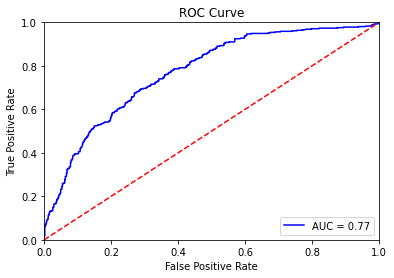

In [22]:
roc(y_test,y_prob)

In [23]:
X_train = x.to_numpy()
Y_train = y.to_numpy().reshape(len(y),1)
X_test = x_test.to_numpy()
Y_test = y_test.to_numpy().reshape(len(y_test),1)

In [24]:
import time
t0 = time.time()
p = X_train.shape[1]
parameters = modelDL(X_train.T, Y_train.T, layers_dims=[p,16,16,1],
                   mini_batch_size=256, learning_rate=0.0001,
                   num_iterations=2000, lambd=0.1)
print(time.time()-t0)

13.968585014343262


Accuracy: 0.6266266266266266


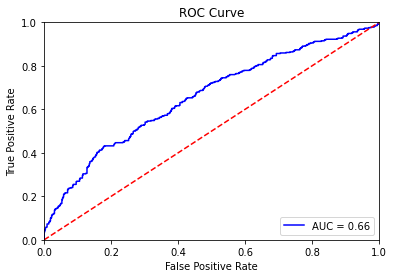

In [25]:
accuracy,y_DLprob = predict(X_test.T, Y_test.T, parameters)
y_prob_DL = pd.Series(y_DLprob.reshape((len(Y_test),)))
roc(y_test,y_prob_DL)

### PyTorch

In [26]:
# https://pytorch.org/tutorials/beginner/basics/intro.html
import torch
from torch import nn

In [27]:
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
Y_train = torch.from_numpy(Y_train).type(torch.FloatTensor)
Y_test = torch.from_numpy(Y_test).type(torch.FloatTensor)

In [28]:
class logitNN(nn.Module):
    def __init__(self,input_dim,nodes):
        super(logitNN, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, nodes),
            nn.ReLU(),
            nn.Linear(nodes, nodes),
            nn.ReLU(),
            nn.Linear(nodes, nodes),
            nn.ReLU(),
            nn.Linear(nodes, 1)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        z = self.linear_relu_stack(x) 
        prob = self.sigmoid(z)
        return prob

In [29]:
input_dim = X_train.shape[1]
model = logitNN(input_dim,16)

In [30]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3879, -0.3521,  0.0826,  0.2780, -0.0128],
         [ 0.3226, -0.3524, -0.2037, -0.0876, -0.4070],
         [-0.1184,  0.4256,  0.0030,  0.4335,  0.1617],
         [-0.2308, -0.0254, -0.1723,  0.1202,  0.2823],
         [-0.2864,  0.2315,  0.3476,  0.3655,  0.2219],
         [-0.1522, -0.3723,  0.1608,  0.1481, -0.3026],
         [ 0.2242, -0.0030, -0.2409, -0.1433,  0.0009],
         [ 0.3785, -0.2421, -0.1828, -0.0464,  0.1912],
         [-0.1171,  0.2633, -0.3077, -0.1854,  0.3144],
         [ 0.0233, -0.4407, -0.1669, -0.3822, -0.4075],
         [-0.0050,  0.3907, -0.0715,  0.3611,  0.2763],
         [ 0.3739, -0.3136,  0.2823, -0.1941,  0.3054],
         [ 0.1930, -0.0834, -0.0381, -0.1470, -0.3870],
         [ 0.3353, -0.3399,  0.3801,  0.0979, -0.0013],
         [ 0.4247, -0.1754, -0.2301,  0.1369,  0.0179],
         [-0.1039,  0.3215,  0.0763,  0.3429, -0.3044]], requires_grad=True),
 Parameter containing:
 tensor([-0.3883,  0.2136,  0.1862, 

In [31]:
# Initialize the loss function
loss_fn = nn.BCELoss() #binary cross entropy

In [32]:
# Optimization
learning_rate = 1e-3
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
# training
def train_loop(data, model, loss_fn, optimizer,num_epochs = 100,epochStep=20):
    X,Y = data
    for epoch in range(num_epochs):
        prob = model(X)
        loss = loss_fn(prob,Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch+1) % epochStep == 0:
            print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

In [34]:
train_loop((X_train,Y_train), model, loss_fn,optimizer,num_epochs=100,epochStep=20)

epoch: 20, loss = 0.6875
epoch: 40, loss = 0.6717
epoch: 60, loss = 0.6461
epoch: 80, loss = 0.6050
epoch: 100, loss = 0.5569


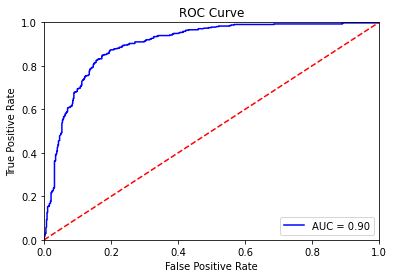

In [35]:
pred = model(X_test)
pred = pred.detach().numpy()
y_prob = pd.Series(pred.reshape((len(pred),)))
roc(y_test,y_prob)

epoch: 50, loss = 0.6876
epoch: 100, loss = 0.6675
epoch: 150, loss = 0.6383
epoch: 200, loss = 0.6098


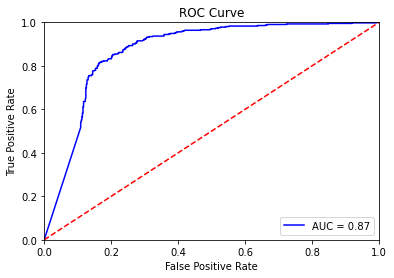

In [36]:
# with different settings
model = logitNN(input_dim,5)
# Initialize the loss function
loss_fn = nn.BCELoss()#binary cross entropy
# Optimization
learning_rate = 1e-3
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loop((X_train,Y_train),model,loss_fn,optimizer,num_epochs=200,epochStep=50)

pred = model(X_test)
pred = pred.detach().numpy()
y_prob = pd.Series(pred.reshape((len(pred),)))
roc(y_test,y_prob)

In [37]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1446,  0.1613, -0.3498,  0.4373,  0.3037],
        [-0.0519, -0.1653,  0.2354, -0.1537,  0.0992],
        [ 0.0049, -0.3652,  0.4362, -0.1347,  0.0615],
        [ 0.0905,  0.1145,  0.1903, -0.2983, -0.0939],
        [ 0.2097, -0.0235,  0.2118, -0.4488, -0.0599]], requires_grad=True), Parameter containing:
tensor([ 0.5338, -0.0187,  0.0036,  0.2197,  0.2433], requires_grad=True), Parameter containing:
tensor([[-0.2494,  0.3430,  0.1699, -0.3431,  0.2788],
        [-0.0673, -0.3138,  0.4160,  0.0526,  0.1433],
        [ 0.6098, -0.0129, -0.2901, -0.6652, -0.1386],
        [ 0.0078,  0.3777, -0.2463,  0.6497,  0.6486],
        [ 0.5543, -0.2054, -0.3417, -0.4709, -0.6124]], requires_grad=True), Parameter containing:
tensor([-0.0019,  0.2835, -0.0740,  0.4159,  0.3260], requires_grad=True), Parameter containing:
tensor([[ 0.1154,  0.1103,  0.5305,  0.0326,  0.6928],
        [ 0.0436, -0.1758,  0.0924, -0.1512,  0.5666],
        [ 0.2345, -0.0249, -0.4015,

In [38]:
# an easy way to 
class logitNN2(nn.Module):
    def __init__(self,input_dim,width=16,depth=2,output_dim=1):
        super(logitNN2,self).__init__()
        self.firstLinear = nn.Linear(input_dim,width)
        self.linearList = nn.ModuleList([nn.Linear(width,width) for _ in range(depth)])
        self.lastLinear = nn.Linear(width,output_dim)
        #self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        x = self.firstLinear(x)
        x = self.sigmoid(x)#self.relu(x)
        for L in self.linearList:
            x = L(x)
            x = self.sigmoid(x)#self.relu(x)
        x = self.lastLinear(x)
        prob = self.sigmoid(x)
        return prob

epoch: 50, loss = 0.7100
epoch: 100, loss = 0.6977
epoch: 150, loss = 0.6928
epoch: 200, loss = 0.6913


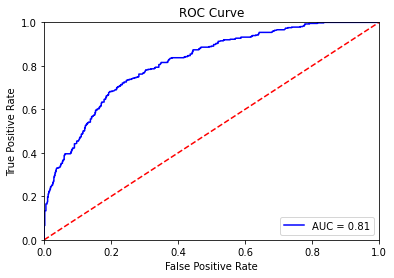

10

In [39]:
model = logitNN2(input_dim,width=5,depth=3)
# Initialize the loss function
loss_fn = nn.BCELoss()
# Optimization
learning_rate = 1e-3
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loop((X_train,Y_train), model, loss_fn,optimizer,num_epochs=200,epochStep=50)

pred = model(X_test)
pred = pred.detach().numpy()
y_prob = pd.Series(pred.reshape((len(pred),)))
roc(y_test,y_prob)
len(list(model.parameters()))

In [40]:
len(list(model.parameters()))

10

In [41]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0904, -0.4830, -0.0640, -0.1220,  0.1054],
        [-0.3501,  0.5144, -0.3226, -0.1004, -0.2948],
        [-0.4687, -0.0155, -0.6889,  0.0113,  0.0197],
        [-0.3158,  0.2695,  0.0346, -0.0725,  0.1321],
        [ 0.0914,  0.4368, -0.5605,  0.4304, -0.1154]], requires_grad=True), Parameter containing:
tensor([0.0768, 0.0551, 0.5193, 0.0860, 0.1331], requires_grad=True), Parameter containing:
tensor([[ 0.0519,  0.0666,  0.4186,  0.0441,  0.4227],
        [-0.1467,  0.0911,  0.1408,  0.0746, -0.2186],
        [ 0.4229,  0.3333,  0.4643,  0.3309,  0.2971],
        [-0.2781, -0.1394,  0.1778, -0.0854, -0.1672],
        [-0.1439, -0.0614,  0.3102,  0.0164,  0.6632]], requires_grad=True), Parameter containing:
tensor([ 0.0991,  0.0172, -0.3022, -0.3619,  0.6174], requires_grad=True), Parameter containing:
tensor([[ 0.5189,  0.3582,  0.1998, -0.2364,  0.1853],
        [-0.3999, -0.2052,  0.2206, -0.4918, -0.0291],
        [ 0.2906,  0.5668,  0.2651,  0.0